In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from sklearn.metrics import classification_report,plot_confusion_matrix
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [4]:
from tensorflow.python.ops.array_ops import shape_eager_fallback
#generators
batch_size = 10

train_data = ImageDataGenerator(
                  rescale=1./255,
                  shear_range = 0.2,
                  zoom_range = 0.2,
                  horizontal_flip = True)

test_data = ImageDataGenerator(rescale=1./255) 

train_generator = train_data.flow_from_directory(
                        "/content/drive/MyDrive/pet data/train",
                        target_size = (150,150),
                        batch_size = batch_size,
                        class_mode ='binary')

test_generator = test_data.flow_from_directory(
                        "/content/drive/MyDrive/pet data/test",
                        target_size = (150,150),
                        batch_size = batch_size,
                        class_mode ='binary')



Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## **Creating Network based on assesment guidelines:**

In [5]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(5,5),padding='valid',activation='relu',input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(5,5),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 146, 146, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 64)        51264     
                                                                 
 batch_normalization_1 (Batc  (None, 69, 69, 64)       256       
 hNormalization)                                                 
                                                        

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_generator,epochs=100,validation_data=test_generator)

Epoch 1/100
4/4 [==============================] - 18s 2s/step - loss: 6.3441 - accuracy: 0.3750 - val_loss: 0.7209 - val_accuracy: 0.5500
Epoch 2/100
4/4 [==============================] - 1s 126ms/step - loss: 4.8555 - accuracy: 0.5750 - val_loss: 0.6214 - val_accuracy: 0.7000
Epoch 3/100
4/4 [==============================] - 0s 119ms/step - loss: 2.6301 - accuracy: 0.7250 - val_loss: 0.7802 - val_accuracy: 0.6500
Epoch 4/100
4/4 [==============================] - 0s 121ms/step - loss: 4.6382 - accuracy: 0.7000 - val_loss: 1.2409 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 122ms/step - loss: 3.0760 - accuracy: 0.6750 - val_loss: 0.7521 - val_accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 0s 126ms/step - loss: 1.4554 - accuracy: 0.7500 - val_loss: 0.7710 - val_accuracy: 0.7000
Epoch 7/100
4/4 [==============================] - 0s 121ms/step - loss: 3.8700 - accuracy: 0.7250 - val_loss: 0.6558 - val_accuracy: 0.6500
Epoch 8/100
4/4

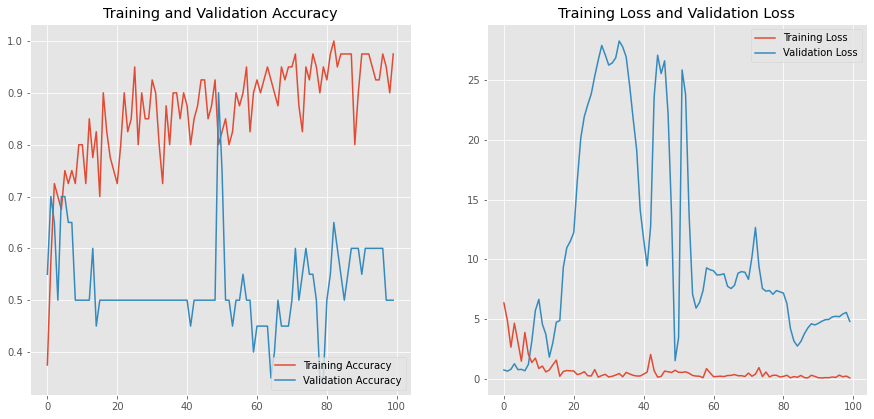

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss and Validation Loss')
plt.show()

# **Model using transfer learning(VGG16):**

In [10]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
model2 = Sequential()

model2.add(conv_base)
model2.add(Flatten())
model2.add(Dense(32,activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(1,activation='sigmoid'))

In [12]:
conv_base.trainable = False

In [13]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history2 = model2.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator)

Epoch 1/10
4/4 [==============================] - 2s 194ms/step - loss: 1.0402 - accuracy: 0.4250 - val_loss: 0.8575 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 1s 138ms/step - loss: 0.7262 - accuracy: 0.6500 - val_loss: 0.6734 - val_accuracy: 0.6000
Epoch 3/10
4/4 [==============================] - 1s 137ms/step - loss: 0.5506 - accuracy: 0.6500 - val_loss: 0.6651 - val_accuracy: 0.6000
Epoch 4/10
4/4 [==============================] - 1s 137ms/step - loss: 0.5427 - accuracy: 0.6750 - val_loss: 0.6084 - val_accuracy: 0.7500
Epoch 5/10
4/4 [==============================] - 1s 139ms/step - loss: 0.4322 - accuracy: 0.9250 - val_loss: 0.5510 - val_accuracy: 0.7000
Epoch 6/10
4/4 [==============================] - 1s 138ms/step - loss: 0.4434 - accuracy: 0.7750 - val_loss: 0.4463 - val_accuracy: 0.8000
Epoch 7/10
4/4 [==============================] - 1s 142ms/step - loss: 0.2731 - accuracy: 0.9250 - val_loss: 0.3902 - val_accuracy: 0.8000
Epoch 8/10
4/4 [====

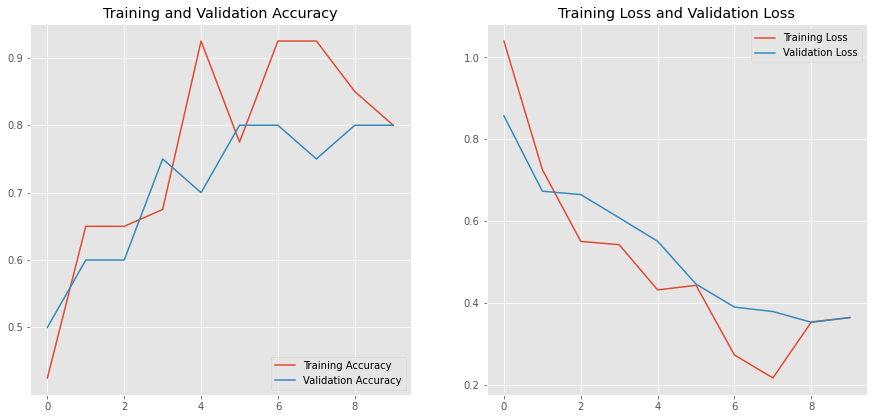

In [15]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss and Validation Loss')
plt.show()

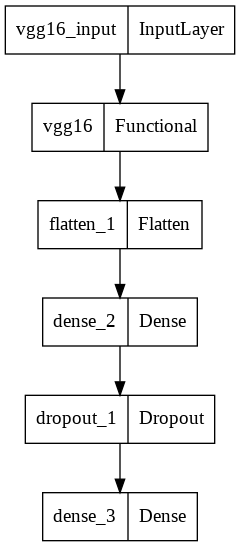

In [16]:
from keras.utils import plot_model
plot_model(model2)

## Test for an image:

In [17]:
import cv2

In [22]:
test_img = cv2.imread('/content/101.jpg')

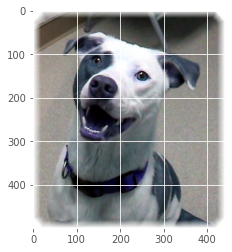

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(500, 441, 3)

In [25]:
test_img = cv2.resize(test_img,(150,150))

In [26]:
test_input = test_img.reshape((1,150,150,3))

In [27]:
model2.predict(test_input)

1/1 [==============================] - 1s 742ms/step


array([[1.]], dtype=float32)